#### Objective : To predict whether an employee is likely to leave the company using Logistic Regression with regularization and hyperparameter tuning for optimal performance.

#### 1. Import libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 2. Load Dataset

In [36]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### 3. Data Preprocessing

##### Drop uninformative columns

In [40]:
data.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace = True)

##### Encode Categorical variables

In [42]:
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])

categorical = data.select_dtypes(include='object').columns
for col in categorical:
    data[col] = le.fit_transform(data[col])

##### Train-Test Split

In [44]:
X = data.drop('Attrition', axis = 1)
y = data[['Attrition']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Feature Scaling

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### 4. Logistic Regression Model (L2 Regularization)

In [49]:
model = LogisticRegression(penalty = 'l2', solver = 'liblinear')
model.fit(X_train, y_train)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

##### Prediction

In [51]:
y_pred = model.predict(X_test)

##### Accuracy, Confusion matrix and Classification Report

In [53]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print('Confusion Matrix : ', confusion_matrix(y_test, y_pred))
print('Classification Report : ', classification_report(y_test, y_pred))

Accuracy Score :  0.8843537414965986
Confusion Matrix :  [[244  11]
 [ 23  16]]
Classification Report :                precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294



#### 5. Hyperparameter Tuning

In [56]:
param_grid = {
    'C' : [0.01, 0.1, 1, 10],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [60]:
print('Best Parameters : ', grid.best_params_)
print('Best accuracy on Training Set : ', grid.best_score_)

Best Parameters :  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy on Training Set :  0.856296429859358


##### Evaluate Tuned model

In [67]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print('Test Accuracy : ', accuracy_score(y_test, y_pred_best))
print('Confusion Matrix : ', confusion_matrix(y_test, y_pred_best))
print('Classification Report : ', classification_report(y_test, y_pred_best))

Test Accuracy :  0.8843537414965986
Confusion Matrix :  [[244  11]
 [ 23  16]]
Classification Report :                precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294



#### Feature Importance

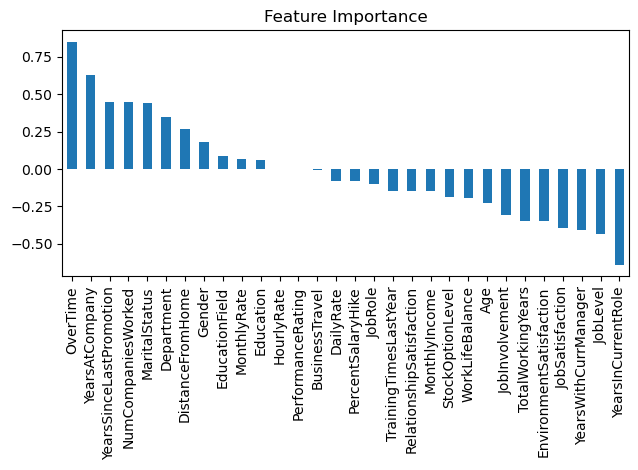

In [74]:
importance = pd.Series(best_model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()